In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("datasets/ispu_dki_all.csv")

In [5]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [7]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


# EDA

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [9]:
pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

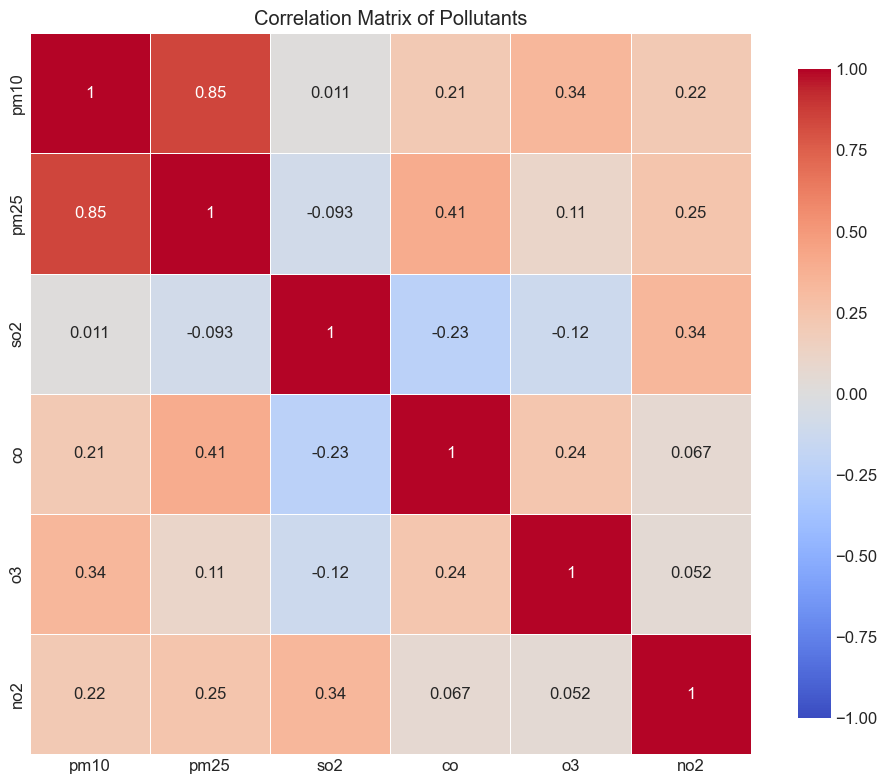

In [10]:
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .9})
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

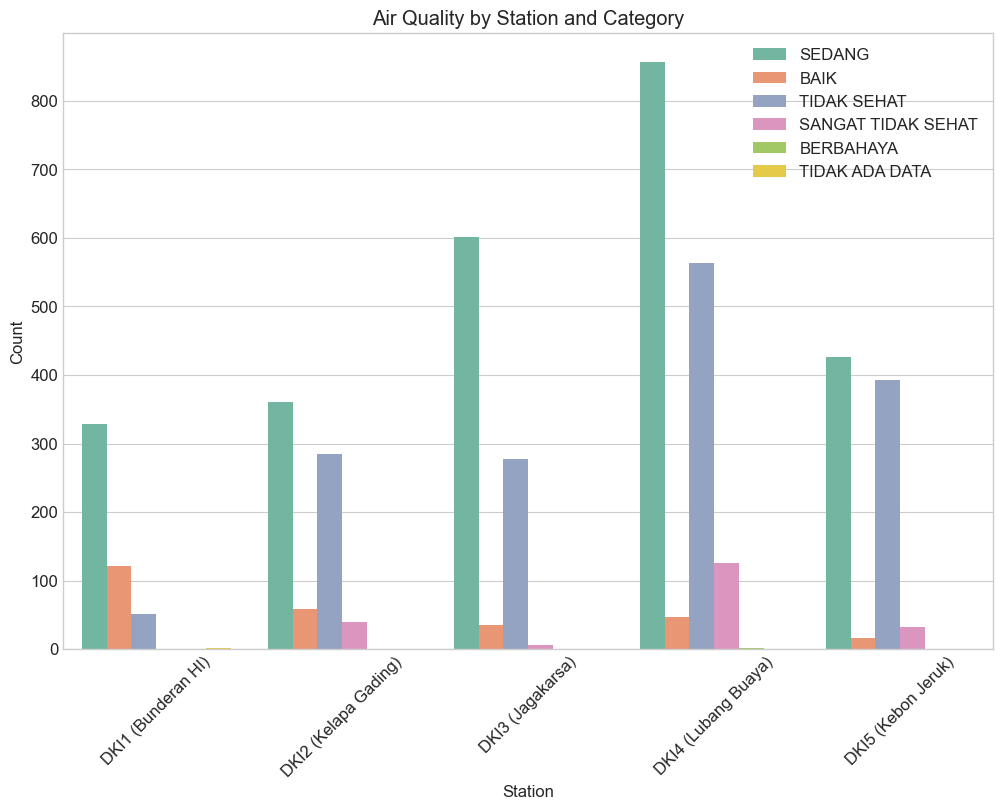

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='stasiun', hue='categori', palette='Set2')
plt.title("Air Quality by Station and Category")
plt.xlabel("Station")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

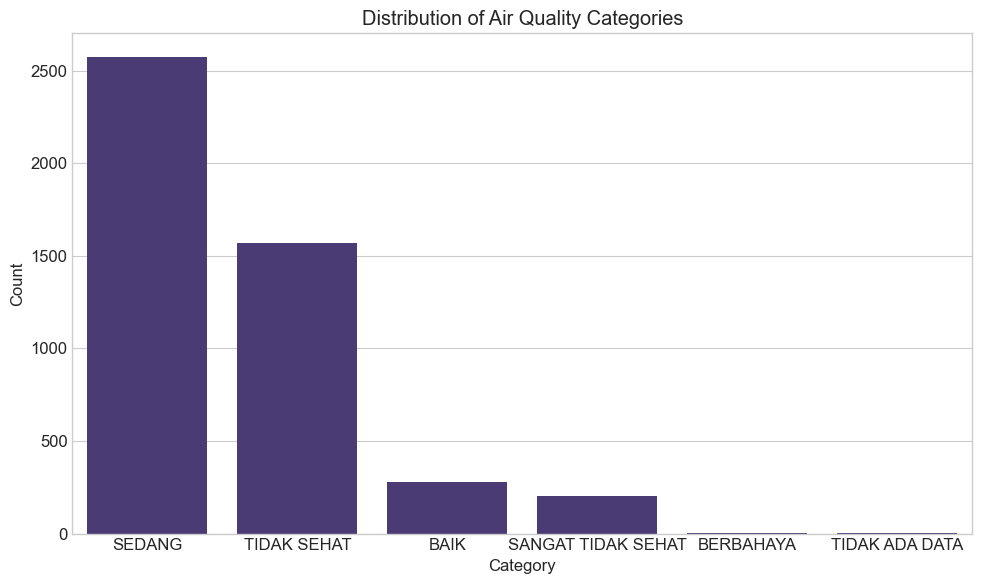

In [12]:
plt.figure(figsize=(10, 6))
category_counts = df['categori'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_20272\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_20272\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_20272\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_20272\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_20272\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].s

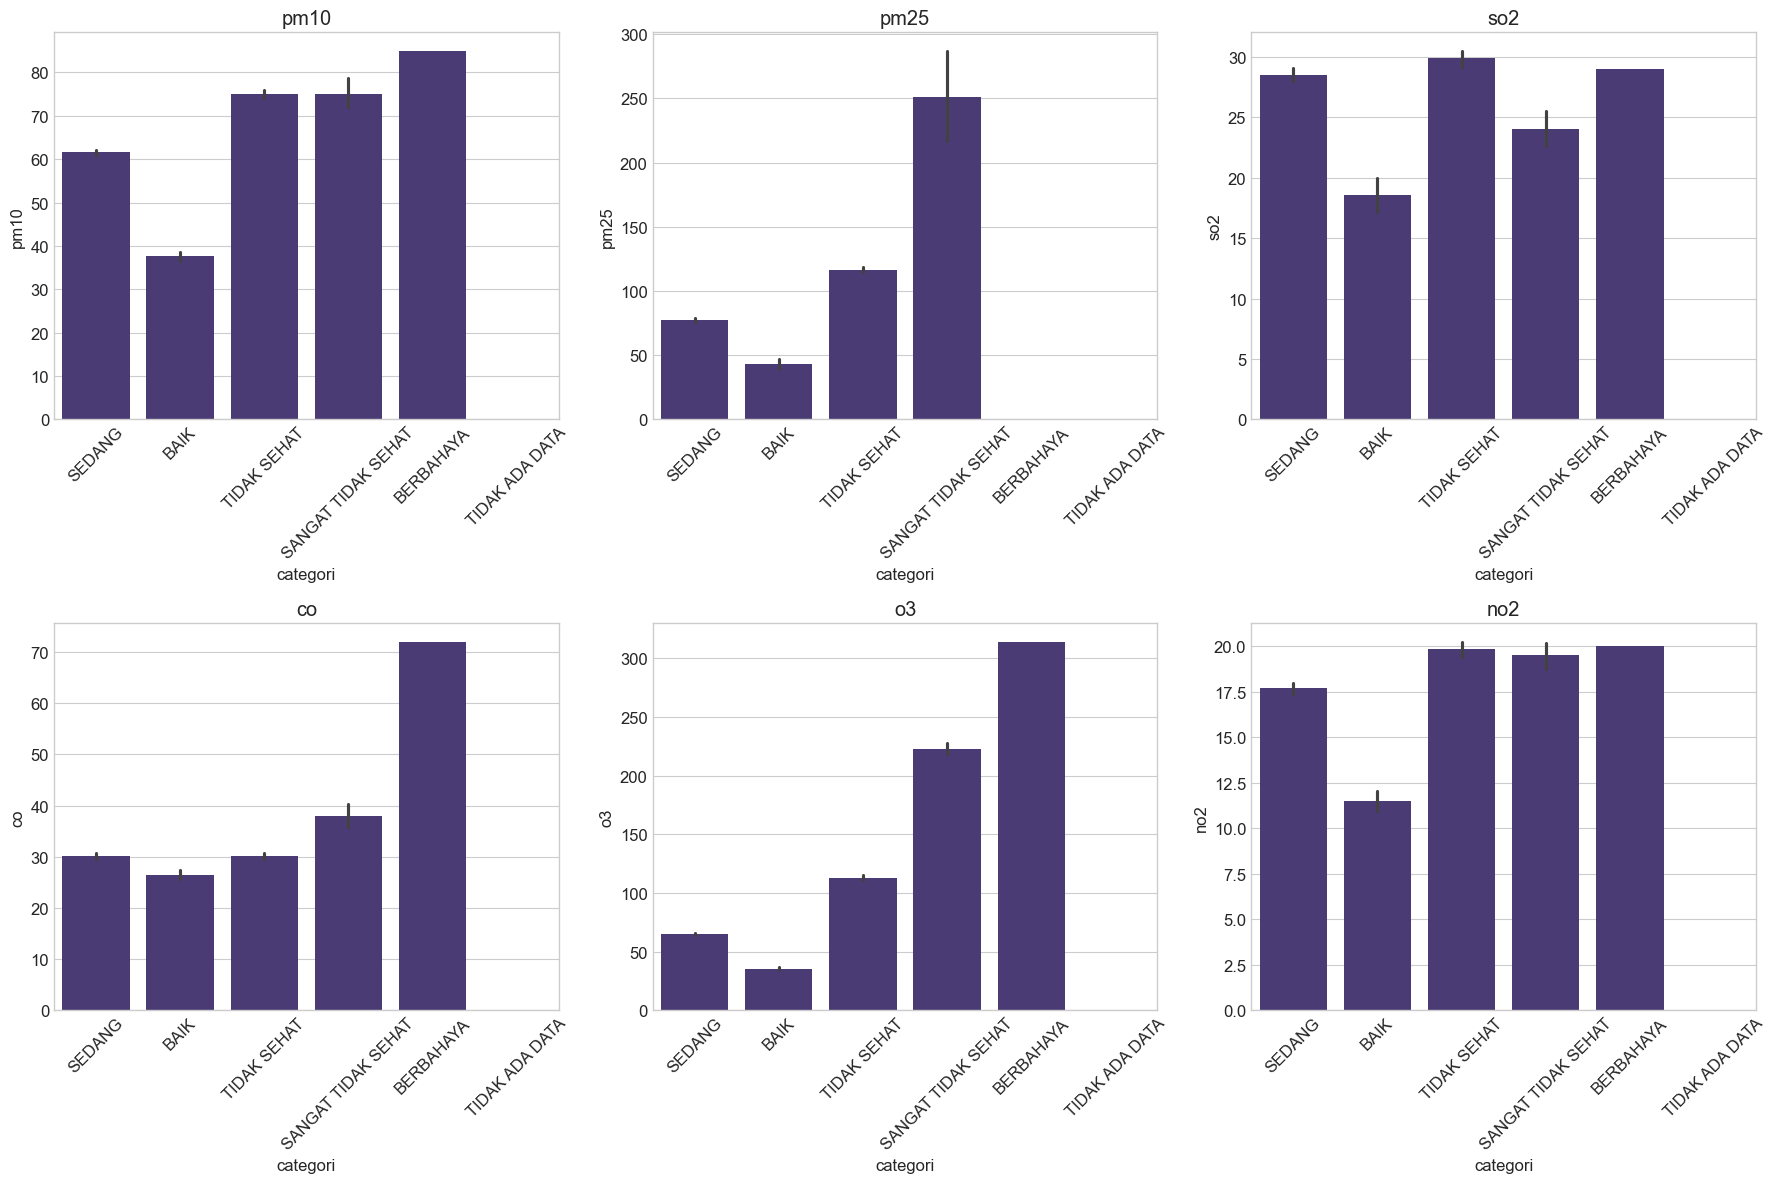

In [13]:
fig, axes = plt.subplots(2,3,figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.barplot(x='categori', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()

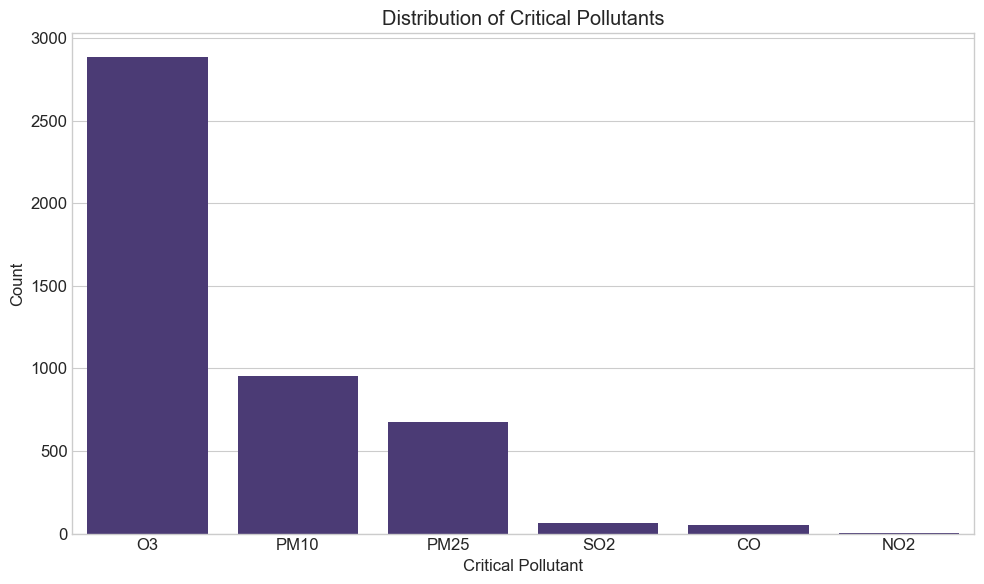

In [14]:
plt.figure(figsize=(10, 6))
critical_counts = df['critical'].value_counts()
sns.barplot(x=critical_counts.index, y=critical_counts.values)
plt.title('Distribution of Critical Pollutants')
plt.xlabel('Critical Pollutant')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

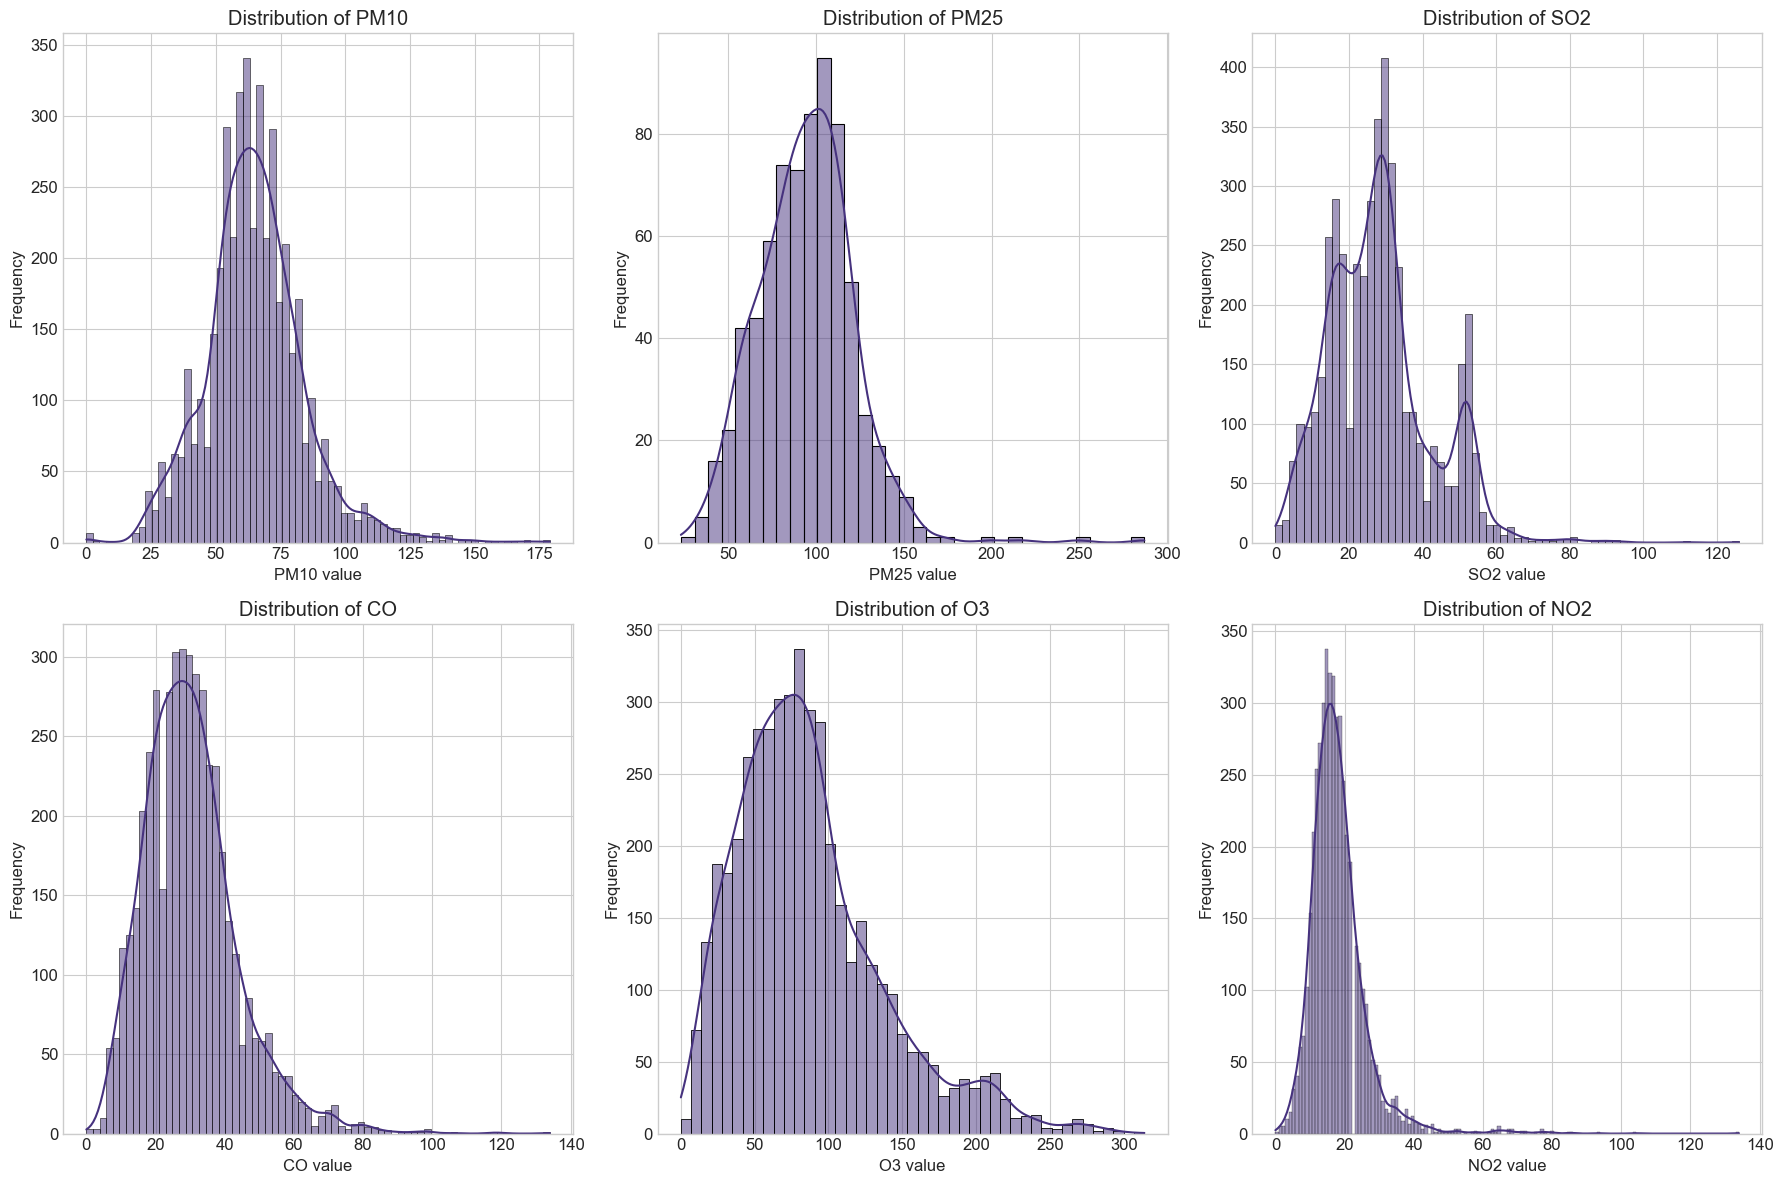

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.upper()}')
    axes[i].set_xlabel(f'{col.upper()} value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

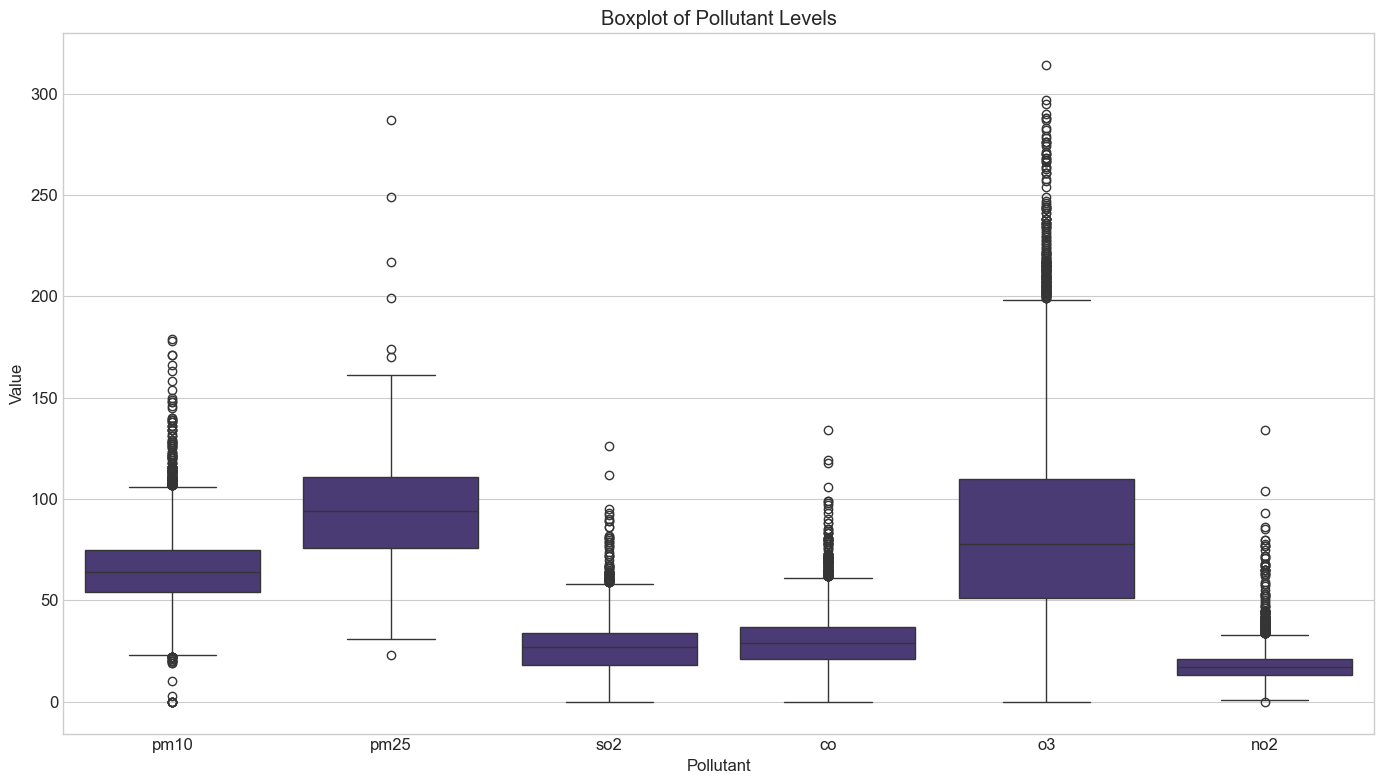

In [16]:
plt.figure(figsize=(14, 8))
melted_df = pd.melt(df[pollutants], var_name='Pollutant', value_name='Value')
sns.boxplot(x='Pollutant', y='Value', data=melted_df)
plt.title('Boxplot of Pollutant Levels')
plt.tight_layout()
plt.show()

In [17]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# axes = axes.flatten()

# for i, col in enumerate(pollutants):
#     stats.probplot(df[col].dropna(), plot=axes[i])
#     axes[i].set_title(f'Q-Q Plot of {col.upper()}')
    
# plt.tight_layout()

In [18]:
for i in pollutants:
    print(i)
    print("Skewness: ", df[i].skew())
    print("Kurtosis: ", df[i].kurtosis())
    print("")

pm10
Skewness:  0.6976283251875913
Kurtosis:  2.543138686566048

pm25
Skewness:  0.8741804093854169
Kurtosis:  4.669665749386857

so2
Skewness:  0.8060767113861756
Kurtosis:  1.3852250609833892

co
Skewness:  1.1495489468612519
Kurtosis:  3.1162217254138214

o3
Skewness:  1.0834534296825264
Kurtosis:  1.3355325598728496

no2
Skewness:  3.09859507356851
Kurtosis:  21.378148794894177



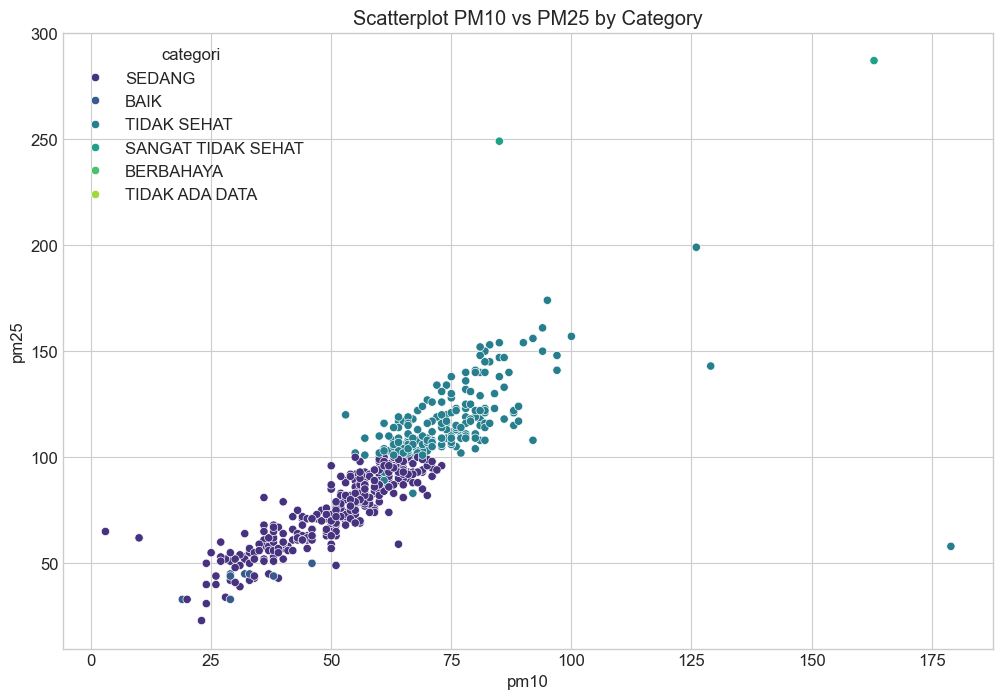

In [19]:
sns.scatterplot(data=df, x='pm10', y='pm25', hue='categori')
plt.title('Scatterplot PM10 vs PM25 by Category')
plt.show()

# Preprocessing Data

In [20]:
df.duplicated().sum()

0

In [21]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.000000
stasiun,0,0.000000
pm10,160,3.458712
pm25,3903,84.370947
so2,19,0.410722
co,8,0.172936
o3,5,0.108085
no2,8,0.172936
max,0,0.000000
critical,1,0.021617


In [22]:
df = df.fillna(df.median(numeric_only=True))

In [23]:
for column in df.columns:
    mode = df[column].mode()
    if not mode.empty:
        df[column] = df[column].fillna(mode[0])

In [24]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.0
stasiun,0,0.0
pm10,0,0.0
pm25,0,0.0
so2,0,0.0
co,0,0.0
o3,0,0.0
no2,0,0.0
max,0,0.0
critical,0,0.0


In [25]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

df['year'] = df['tanggal'].dt.year
df['month'] = df['tanggal'].dt.month
df['day'] = df['tanggal'].dt.day
df['dayofweek'] = df['tanggal'].dt.dayofweek  
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)
df['month_day'] = df['month'] * df['day']
df['weekend_month'] = df['is_weekend'] * df['month']
df['quarter'] = df['tanggal'].dt.quarter
df['weekofyear'] = df['tanggal'].dt.isocalendar().week

In [26]:
pd.set_option('display.max_columns', None)
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,year,month,day,dayofweek,is_weekend,month_sin,month_cos,dayofweek_sin,dayofweek_cos,month_day,weekend_month,quarter,weekofyear
0,2010-01-01,DKI1 (Bunderan HI),60.0,94.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,2010,1,1,4,0,0.5,0.866025,-0.433884,-0.900969,1,0,1,53
1,2010-01-02,DKI1 (Bunderan HI),32.0,94.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,2010,1,2,5,1,0.5,0.866025,-0.974928,-0.222521,2,1,1,53
2,2010-01-03,DKI1 (Bunderan HI),27.0,94.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,2010,1,3,6,1,0.5,0.866025,-0.781831,0.623490,3,1,1,53
3,2010-01-04,DKI1 (Bunderan HI),22.0,94.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK,2010,1,4,0,0,0.5,0.866025,0.000000,1.000000,4,0,1,1
4,2010-01-05,DKI1 (Bunderan HI),25.0,94.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK,2010,1,5,1,0,0.5,0.866025,0.781831,0.623490,5,0,1,1


In [27]:
pd.reset_option('display.max_columns')

In [28]:
df.drop(columns=['tanggal', 'stasiun', 'pm25'], inplace=True)

In [29]:
df = df[df['categori'] != 'BERBAHAYA']
df = df[df['categori'] != 'TIDAK ADA DATA']


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pm10           4624 non-null   float64
 1   so2            4624 non-null   float64
 2   co             4624 non-null   float64
 3   o3             4624 non-null   float64
 4   no2            4624 non-null   float64
 5   max            4624 non-null   float64
 6   critical       4624 non-null   object 
 7   categori       4624 non-null   object 
 8   year           4624 non-null   int32  
 9   month          4624 non-null   int32  
 10  day            4624 non-null   int32  
 11  dayofweek      4624 non-null   int32  
 12  is_weekend     4624 non-null   int64  
 13  month_sin      4624 non-null   float64
 14  month_cos      4624 non-null   float64
 15  dayofweek_sin  4624 non-null   float64
 16  dayofweek_cos  4624 non-null   float64
 17  month_day      4624 non-null   int32  
 18  weekend_month

In [31]:
df = pd.get_dummies(df, columns=['critical'])

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['categori'] = label_encoder.fit_transform(df['categori'])

<Axes: >

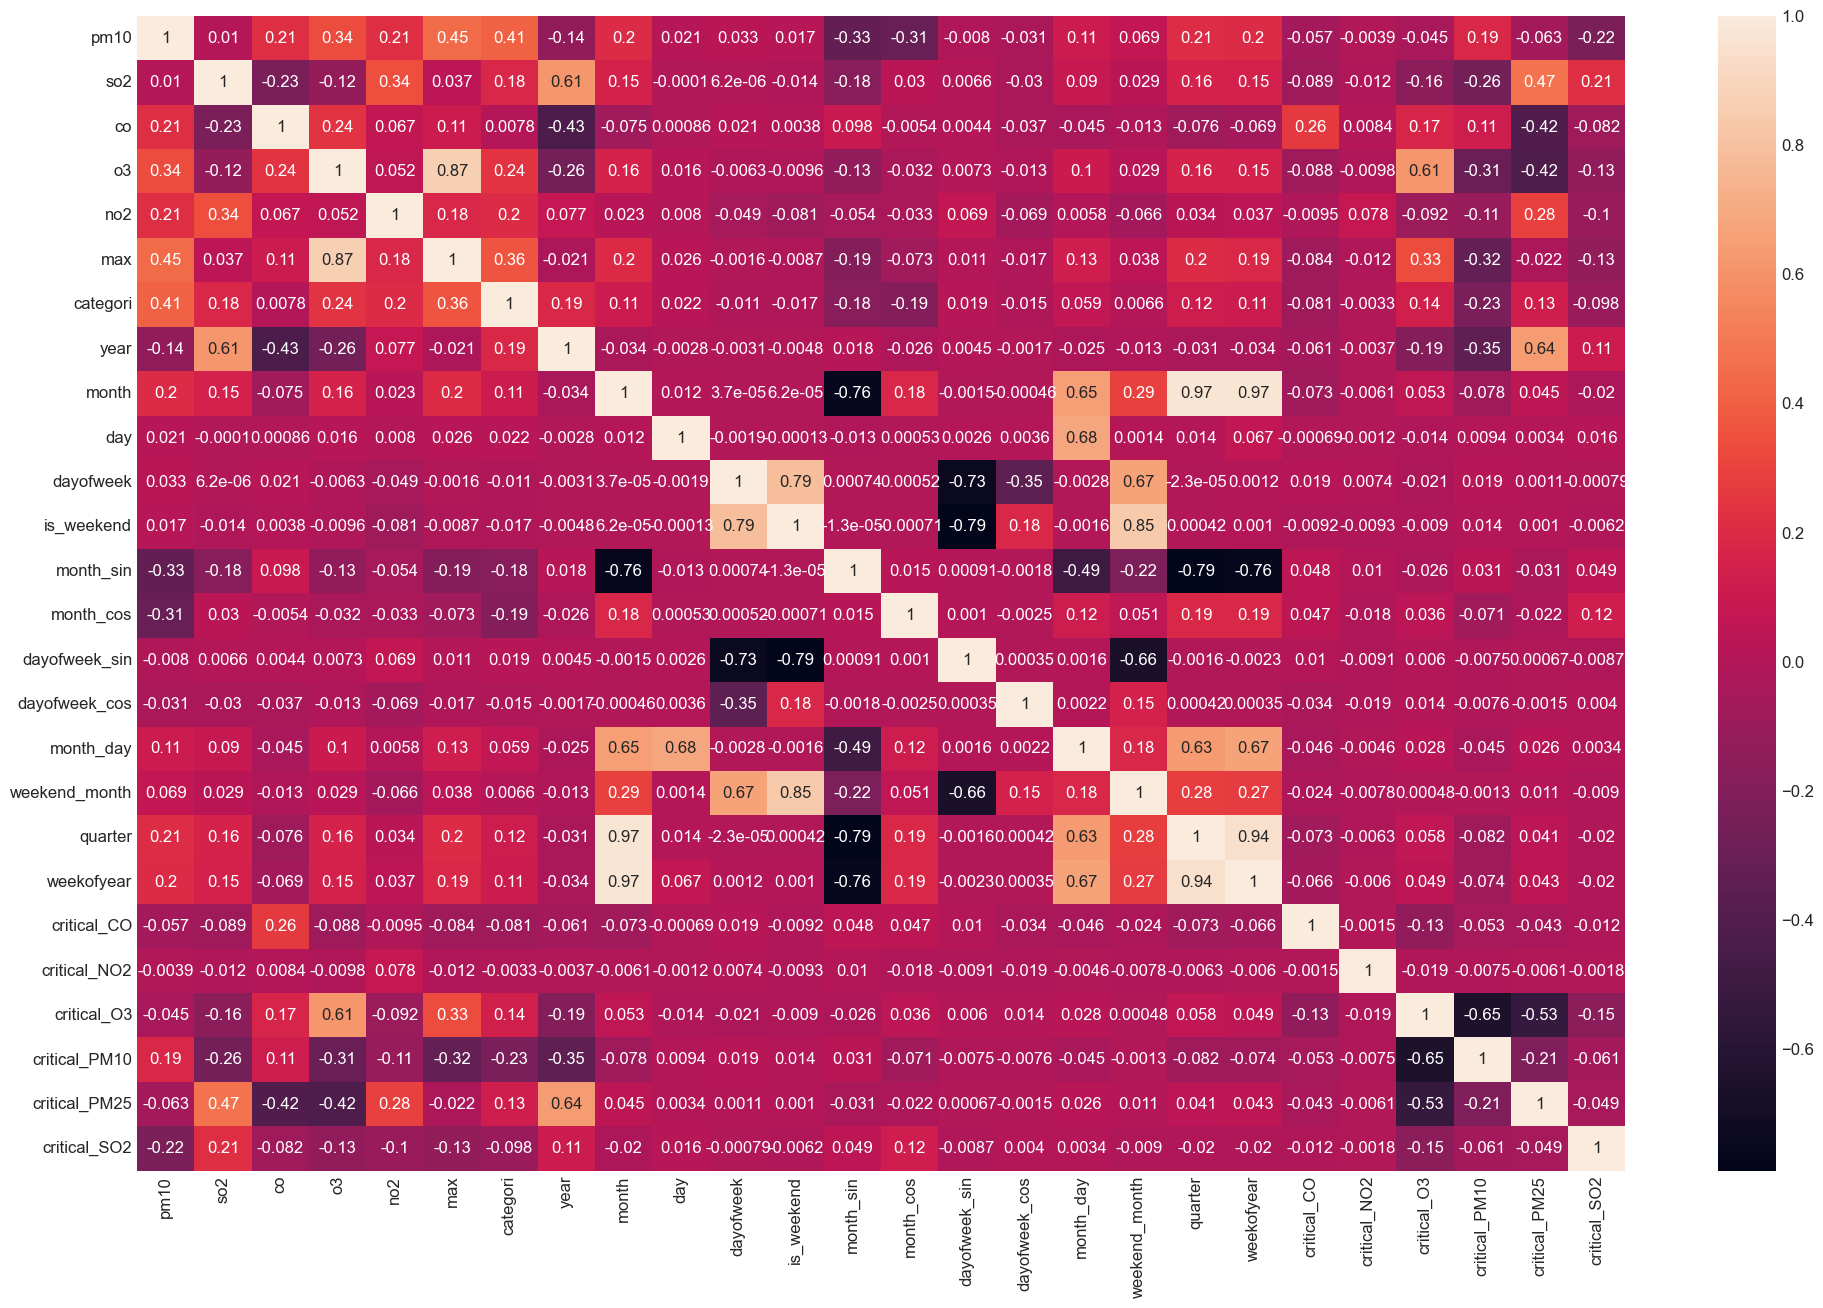

In [33]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(), annot=True)

# MODELLING

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle

C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [35]:
def split_data(X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y)
    relative_val_size = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=relative_val_size, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

def perform_cross_validation(model, X, y, cv=5, scoring='f1_weighted'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"Cross-validation scores ({cv}-fold): {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

# Modelling Date

In [36]:
X = df[['year', 'month', 'day', 'month_sin', 'month_cos', 
        'dayofweek_sin', 'dayofweek_cos', 'is_weekend', 'month_day', 'weekend_month', 'dayofweek', 'quarter', 'weekofyear']]
y = df['categori']

In [37]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [38]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

with open("models/weather_date_scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)


In [39]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, random_state=42),
    "LightBGM": LGBMClassifier(objective='multiclass',num_class=4,random_state=42),
}

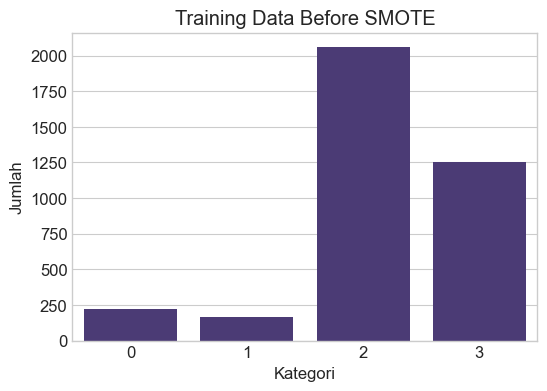

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

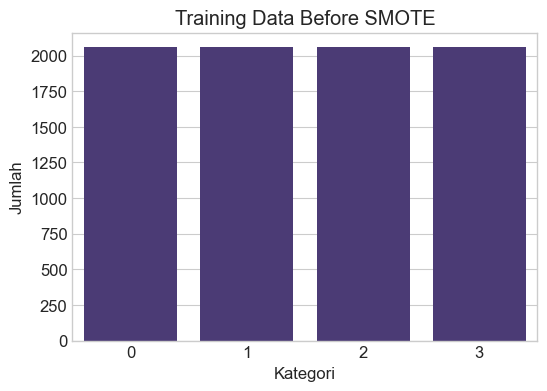

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [44]:
for name, model in models.items():
    print(name)
    perform_cross_validation(model,X_train,y_train)
    print("==================================")

Random Forest
Cross-validation scores (5-fold): [0.7545311  0.77931934 0.79223922 0.83560173 0.85390097]
Mean CV score: 0.8031, Std: 0.0366
XGBoost
Cross-validation scores (5-fold): [0.74979003 0.79760209 0.80069601 0.86472707 0.87394023]
Mean CV score: 0.8174, Std: 0.0462
LightBGM


KeyboardInterrupt: 

In [ ]:
val_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted')

    val_scores[name] = [acc, rec, f1, prec]
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(f"Validation Recall ({name}): {rec:.4f}")
    print(f"Validation F1 ({name}): {f1:.4f}")
    print(f"Validation Precision ({name}): {prec:.4f}")
    print(classification_report(y_val, y_val_pred))


Training Random Forest...
Validation Accuracy (Random Forest): 0.6320
Validation Recall (Random Forest): 0.6320
Validation F1 (Random Forest): 0.6295
Validation Precision (Random Forest): 0.6275
              precision    recall  f1-score   support

           0       0.45      0.46      0.46        28
           1       0.29      0.25      0.27        20
           2       0.71      0.74      0.73       257
           3       0.56      0.54      0.55       157

    accuracy                           0.63       462
   macro avg       0.50      0.50      0.50       462
weighted avg       0.63      0.63      0.63       462


Training XGBoost...
Validation Accuracy (XGBoost): 0.7035
Validation Recall (XGBoost): 0.7035
Validation F1 (XGBoost): 0.6980
Validation Precision (XGBoost): 0.6969
              precision    recall  f1-score   support

           0       0.57      0.46      0.51        28
           1       0.47      0.35      0.40        20
           2       0.74      0.81      0

In [ ]:
metric_name = ["Accuracy", "Recall", "F1_Score", "Precision"]

df_val_score = pd.DataFrame(val_scores, index=metric_name).T

print(df_val_score)

               Accuracy    Recall  F1_Score  Precision
Random Forest  0.632035  0.632035  0.629487   0.627544
XGBoost        0.703463  0.703463  0.698037   0.696896
LightBGM       0.688312  0.688312  0.683316   0.682022


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 150, 200, 300, 500],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print(f"Best Random Forest params: {grid_rf.best_params_}")

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


KeyboardInterrupt: 

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1], 
    'reg_lambda': [1, 1.5, 2],
}

xgb = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print(f"Best XGBoost params: {grid_xgb.best_params_}")



Fitting 5 folds for each of 11664 candidates, totalling 58320 fits
Best XGBoost params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}


In [ ]:
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 1],
    'min_child_samples': [20],
    'min_split_gain': [0.0, 0.1]
}

lgb = LGBMClassifier(objective='multiclass',num_class=4,random_state=42)

grid_lgb = GridSearchCV(lgb, param_grid_lgb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_lgb.fit(X_train, y_train)

print(f"Best LightGBM params: {grid_lgb.best_params_}")

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 8236, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
models = {
    'Random Forest Tuned': grid_rf.best_estimator_,
    'XGBoost Tuned': grid_xgb.best_estimator_,
    'LightGBM Tuned': grid_lgb.best_estimator_
}

val_scores = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted')

    val_scores[name] = [acc, rec, f1, prec]
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(f"Validation Recall ({name}): {rec:.4f}")
    print(f"Validation F1 ({name}): {f1:.4f}")
    print(f"Validation Precision ({name}): {prec:.4f}")
    print(classification_report(y_val, y_val_pred))


Evaluating Random Forest Tuned...
Validation Accuracy (Random Forest Tuned): 0.6991
Validation Recall (Random Forest Tuned): 0.6991
Validation F1 (Random Forest Tuned): 0.6989
Validation Precision (Random Forest Tuned): 0.6991
              precision    recall  f1-score   support

           0       0.42      0.46      0.44        28
           1       0.44      0.40      0.42        20
           2       0.76      0.77      0.77       257
           3       0.68      0.66      0.67       157

    accuracy                           0.70       462
   macro avg       0.58      0.57      0.57       462
weighted avg       0.70      0.70      0.70       462


Evaluating XGBoost Tuned...
Validation Accuracy (XGBoost Tuned): 0.6970
Validation Recall (XGBoost Tuned): 0.6970
Validation F1 (XGBoost Tuned): 0.6899
Validation Precision (XGBoost Tuned): 0.6908
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        28
           1       0.44      0

In [ ]:
metric_name = ["Accuracy", "Recall", "F1_Score", "Precision"]

df_val_score = pd.DataFrame(val_scores, index=metric_name).T

print(df_val_score)

                     Accuracy    Recall  F1_Score  Precision
Random Forest Tuned  0.699134  0.699134  0.698896   0.699067
XGBoost Tuned        0.696970  0.696970  0.689862   0.690822
LightGBM Tuned       0.712121  0.712121  0.708084   0.706778


=== TEST SET METRICS ===
Accuracy: 0.6847
F1 Score: 0.6828
Recall: 0.6847
Precision: 0.6848
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        28
           1       0.53      0.45      0.49        20
           2       0.75      0.75      0.75       258
           3       0.61      0.65      0.63       157

    accuracy                           0.68       463
   macro avg       0.64      0.57      0.60       463
weighted avg       0.68      0.68      0.68       463



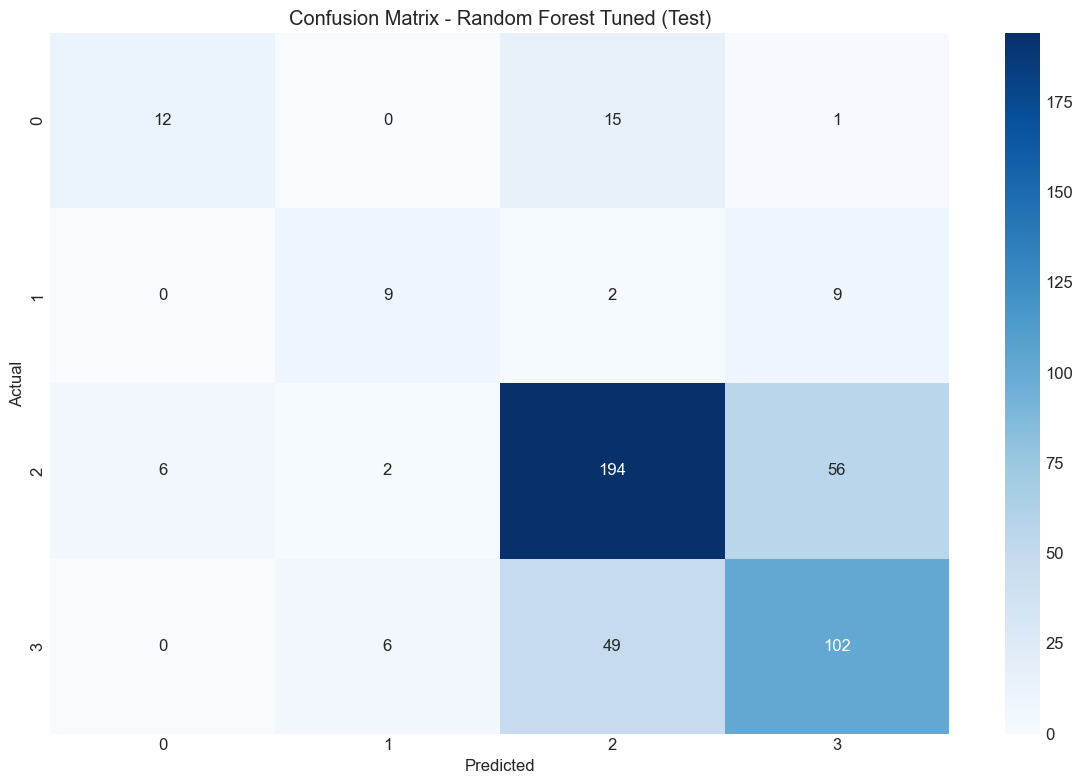

=== TEST SET METRICS ===
Accuracy: 0.6436
F1 Score: 0.6372
Recall: 0.6436
Precision: 0.6374
              precision    recall  f1-score   support

           0       0.53      0.29      0.37        28
           1       0.60      0.45      0.51        20
           2       0.69      0.75      0.72       258
           3       0.57      0.56      0.57       157

    accuracy                           0.64       463
   macro avg       0.60      0.51      0.54       463
weighted avg       0.64      0.64      0.64       463



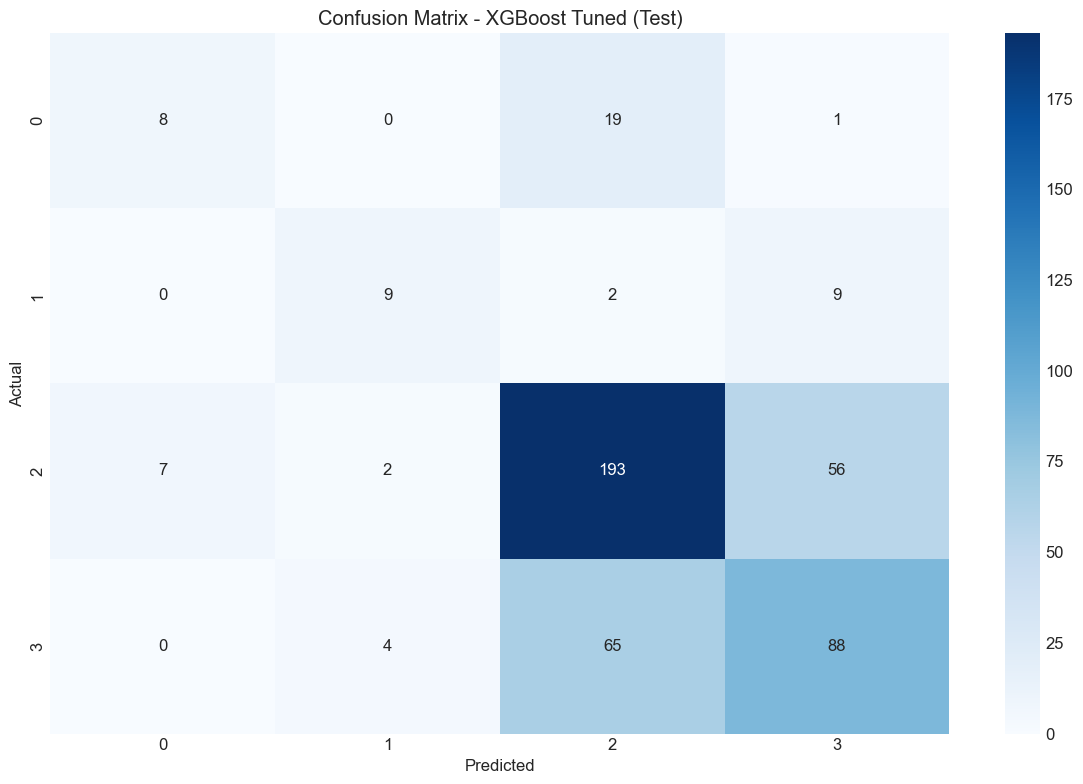

=== TEST SET METRICS ===
Accuracy: 0.6263
F1 Score: 0.6206
Recall: 0.6263
Precision: 0.6232
              precision    recall  f1-score   support

           0       0.53      0.29      0.37        28
           1       0.67      0.40      0.50        20
           2       0.68      0.72      0.70       258
           3       0.54      0.55      0.55       157

    accuracy                           0.63       463
   macro avg       0.61      0.49      0.53       463
weighted avg       0.62      0.63      0.62       463



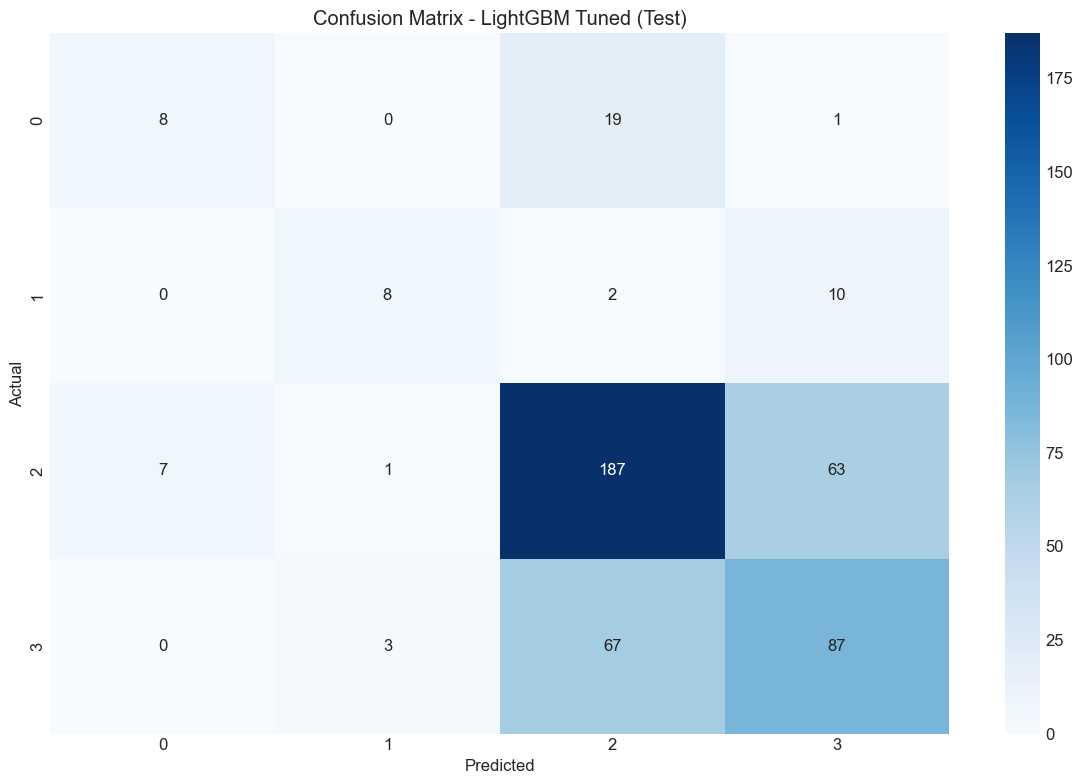

In [ ]:
test_scores = {}

def evaluate_model(model, X_val, y_val, X_test, y_test, model_name):
    
    y_test_pred = model.predict(X_test)
    
    print("=== TEST SET METRICS ===")
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    
    test_scores[model_name] = {
        'accuracy': accuracy,
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(classification_report(y_test, y_test_pred))
    
    
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), 
                yticklabels=np.unique(y),
                )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name} (Test)')
    
    plt.tight_layout()
    plt.show()
    
    
for i, model in models.items():
    evaluate_model(model, X_val, y_val, X_test, y_test, i)

In [ ]:
results = {
    'Random Forest Tuned': {
        'accuracy': 0.6846652267818575,
        'f1': 0.6828014750336094,
        'recall': 0.6846652267818575,
        'precision': 0.6848467015980674
    },
    'XGBoost Tuned': {
        'accuracy': 0.6436285097192225,
        'f1': 0.6371613552946616,
        'recall': 0.6436285097192225,
        'precision': 0.6374097998427406
    },
    'LightGBM Tuned': {
        'accuracy': 0.6263498920086393,
        'f1': 0.6206477587647321,
        'recall': 0.6263498920086393,
        'precision': 0.6232077235063431
    }
}

df = pd.DataFrame(results).T
print(df.round(4))

                     accuracy      f1  recall  precision
Random Forest Tuned    0.6847  0.6828  0.6847     0.6848
XGBoost Tuned          0.6436  0.6372  0.6436     0.6374
LightGBM Tuned         0.6263  0.6206  0.6263     0.6232


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Buat voting ensemble dari model tuned
voting_clf = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest Tuned']),
        ('xgb', models['XGBoost Tuned']),
        ('lgb', models['LightGBM Tuned'])
    ],
    voting='soft'  # gunakan soft voting untuk multiclass yang lebih akurat
)

# Fit ke data
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluasi
print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 8236, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Meta model (bisa juga pakai RandomForest, XGBoost, dsb)
meta_model = RandomForestClassifier(random_state=42)

# Buat stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', models['Random Forest Tuned']),
        ('xgb', models['XGBoost Tuned']),
        ('lgb', models['LightGBM Tuned'])
    ],
    final_estimator=meta_model,
    passthrough=True  # ikutkan fitur asli ke meta model juga
)

# Fit dan evaluasi
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

print("Stacking Classifier Performance:")
print(classification_report(y_test, y_pred_stack))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 8236, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np

probs = stacking_clf.predict_proba(X_test)

# Fokus ke kelas 0
precision, recall, thresholds = precision_recall_curve((y_test == 0).astype(int), probs[:, 0])

# Coba threshold yang lebih rendah untuk menaikkan recall kelas 0
custom_thresh = 0.2
y_pred_custom = np.argmax(probs, axis=1)

# Buat custom prediksi dengan threshold hanya untuk kelas 0
y_pred_custom[(probs[:, 0] > custom_thresh)] = 0

# Lihat hasil akhir
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.50      0.43      0.46        28
           1       0.73      0.40      0.52        20
           2       0.73      0.78      0.75       258
           3       0.64      0.63      0.63       157

    accuracy                           0.69       463
   macro avg       0.65      0.56      0.59       463
weighted avg       0.69      0.69      0.69       463



# Model 2

In [45]:
X = df[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical_PM10', 'critical_SO2', 'critical_CO', 'critical_O3', 'critical_NO2']]
y = df['categori'] 

In [46]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [47]:
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_val = scaler2.transform(X_val)
X_test = scaler2.transform(X_test)

with open("models/weather_scaler2.pkl", 'wb') as file:
    pickle.dump(scaler2, file)

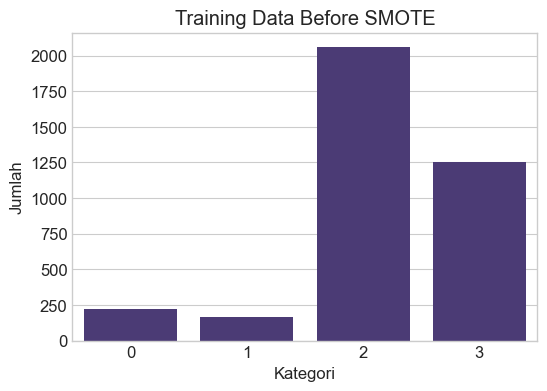

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [49]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_test

array([[-0.16810523,  0.71978886, -1.84124805, ..., -0.10304544,
        -1.31735281,  0.        ],
       [ 1.9735819 , -0.80339402,  3.57294076, ..., -0.10304544,
        -1.31735281,  0.        ],
       [-0.32481405,  1.00991893, -1.11935621, ..., -0.10304544,
        -1.31735281,  0.        ],
       ...,
       [-0.11586896, -1.02099157, -0.18089682, ..., -0.10304544,
         0.75909809,  0.        ],
       [-0.42928659, -1.52871919,  0.32442747, ..., -0.10304544,
        -1.31735281,  0.        ],
       [-0.06363269, -0.07806884, -0.6862211 , ..., -0.10304544,
        -1.31735281,  0.        ]])

In [ ]:
y_test[y_test == 3]

1157    3
613     3
3142    3
4050    3
831     3
       ..
4452    3
3235    3
4517    3
3065    3
4490    3
Name: categori, Length: 236, dtype: int32

In [50]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

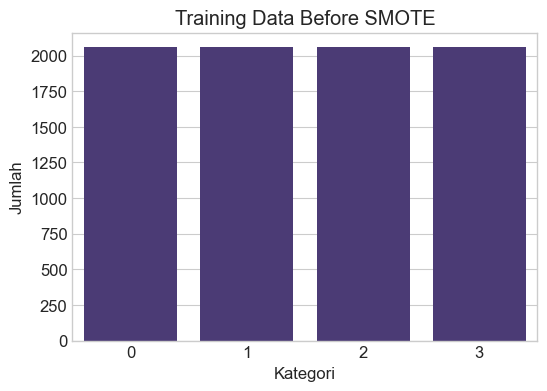

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [52]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, random_state=42),
    "LightBGM": LGBMClassifier(objective='multiclass',num_class=4,random_state=42),
}

In [53]:
import pickle
from sklearn.tree import export_text
val_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_val_pred)
    val_scores[name] = acc
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(classification_report(y_val, y_val_pred))
    
    y_test_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_test_pred)
    val_scores[name] = acc
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")


    print(classification_report(y_test, y_test_pred))

    with open('models/weather_model2.pkl', 'wb') as f:
       pickle.dump(model, f)
    
    print("Date model created and saved as models/date_model.pkl")

    feature_names = ['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical_PM10', 'critical_SO2', 'critical_CO', 'critical_O3', 'critical_NO2']
    for idx, tree in enumerate(model.estimators_):
      print(f"Tree {idx}")
      print(export_text(tree, feature_names=feature_names))
      print("="*50)
  
    break




Training Random Forest...
Validation Accuracy (Random Forest): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       157

    accuracy                           1.00       462
   macro avg       1.00      1.00      1.00       462
weighted avg       1.00      1.00      1.00       462

Validation Accuracy (Random Forest): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00       157

    accuracy                           1.00       463
   macro avg       1.00      1.00      1.00       463
weighted avg       1.00      1.00      1.00       463

Date model crea

In [ ]:
import pickle
with open('models/weather_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    
print("Date model created and saved as models/date_model.pkl")

Date model created and saved as models/date_model.pkl


Model 1

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 150,200,300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5,8, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print(f"🔥 Best Random Forest params: {grid_rf.best_params_}")



Fitting 5 folds for each of 192 candidates, totalling 960 fits


🔥 Best Random Forest params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' is not supported with the 'liblinear' solver, so we stick with 'l2'.
    'solver': ['liblinear']  # 'liblinear' is the most common solver for small datasets.
}

lr = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

print(f"🔥 Best Logistic Regression params: {grid_lr.best_params_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
🔥 Best Logistic Regression params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

print(f"🔥 Best KNN params: {grid_knn.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔥 Best KNN params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
models = {
    'Random Forest Tuned': grid_rf.best_estimator_,
    'Logistic Regression Tuned': grid_lr.best_estimator_,
    'KNN Tuned': grid_knn.best_estimator_
}

val_scores = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_val_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_val_pred)
    val_scores[name] = acc
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(classification_report(y_val, y_val_pred))


Evaluating Random Forest Tuned...
Validation Accuracy (Random Forest Tuned): 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00       387
           3       1.00      1.00      1.00       235

    accuracy                           1.00       694
   macro avg       1.00      0.99      1.00       694
weighted avg       1.00      1.00      1.00       694


Evaluating Logistic Regression Tuned...
Validation Accuracy (Logistic Regression Tuned): 0.8343
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        42
           1       0.97      0.97      0.97        30
           2       0.91      0.79      0.84       387
           3       0.73      0.86      0.79       235

    accuracy                           0.83       694
   macro avg       0.86      0.90      0.88       694
wei